In [1]:
import pandas as pd
cv = nb = pd.read_csv('covid.csv')

In [2]:
cv.head(8)

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-11,Interior,F,30-39,Lab-diagnosed
5,2020-02-20,Fraser,F,30-39,Lab-diagnosed
6,2020-02-21,Fraser,M,40-49,Lab-diagnosed
7,2020-02-27,Vancouver Coastal,F,60-69,Lab-diagnosed


In [3]:
cv.shape

(12554, 5)

In [4]:
cv.columns

Index(['Reported_Date', 'HA', 'Sex', 'Age_Group', 'Classification_Reported'], dtype='object')

In [5]:
cv['Reported_Date'] = pd.to_datetime(cv['Reported_Date'])

In [6]:
cv['month']= cv['Reported_Date'].dt.month
cv.head(8)

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,month
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed,1
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed,2
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed,2
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed,2
4,2020-02-11,Interior,F,30-39,Lab-diagnosed,2
5,2020-02-20,Fraser,F,30-39,Lab-diagnosed,2
6,2020-02-21,Fraser,M,40-49,Lab-diagnosed,2
7,2020-02-27,Vancouver Coastal,F,60-69,Lab-diagnosed,2


In [7]:
monthcase = cv.groupby('month')['HA'].count()
monthdict = dict(monthcase)
monthdict

{1: 1,
 2: 8,
 3: 1049,
 4: 1088,
 5: 447,
 6: 337,
 7: 760,
 8: 2180,
 9: 3392,
 10: 3292}

In [8]:
max(monthdict.values())

3392

In [9]:
import matplotlib.pyplot as plt

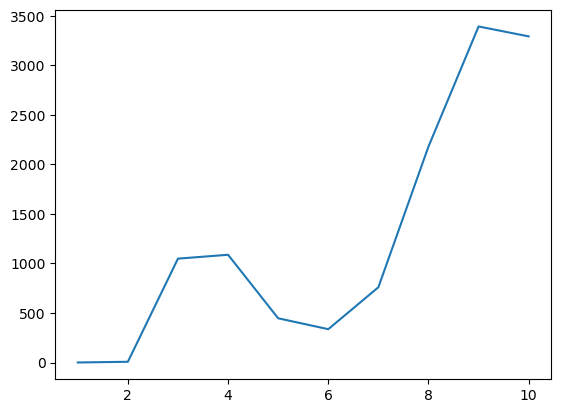

In [10]:
plt.plot(monthcase)

In [11]:
cv.groupby(['month','Sex'])['HA'].count()

month  Sex
1      M         1
2      F         6
       M         2
3      F       570
       M       479
4      F       538
       M       549
       U         1
5      F       227
       M       218
       U         2
6      F       167
       M       168
       U         2
7      F       387
       M       364
       U         9
8      F      1013
       M      1161
       U         6
9      F      1668
       M      1705
       U        19
10     F      1629
       M      1635
       U        28
Name: HA, dtype: int64

In [12]:
f = cv[cv['Sex'] == 'F']
m = cv[cv['Sex'] == 'M']

In [13]:
fmonth = f.groupby('month')['HA'].count()
mmonth = m.groupby('month')['HA'].count()

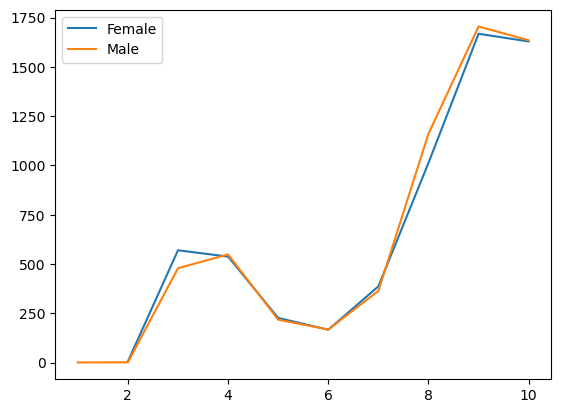

In [14]:
plt.plot(fmonth,label = 'Female')
plt.plot(mmonth,label = 'Male')
plt.legend()

In [15]:
dictf = dict(fmonth)
dictm = dict(mmonth)

In [16]:
dictf

{2: 6, 3: 570, 4: 538, 5: 227, 6: 167, 7: 387, 8: 1013, 9: 1668, 10: 1629}

In [17]:
dictm

{1: 1,
 2: 2,
 3: 479,
 4: 549,
 5: 218,
 6: 168,
 7: 364,
 8: 1161,
 9: 1705,
 10: 1635}

In [18]:
min(dictf, key=dictf.get)

2

In [19]:
cv.groupby(['month','HA'])['HA'].count()

month  HA               
1      Out of Canada           1
2      Fraser                  2
       Interior                1
       Out of Canada           2
       Vancouver Coastal       3
3      Fraser                350
       Interior              108
       Northern               16
       Out of Canada           9
       Vancouver Coastal     495
       Vancouver Island       71
4      Fraser                617
       Interior               66
       Northern               33
       Out of Canada           5
       Vancouver Coastal     315
       Vancouver Island       52
5      Fraser                329
       Interior               17
       Northern               15
       Out of Canada          10
       Vancouver Coastal      69
       Vancouver Island        7
6      Fraser                242
       Interior                6
       Northern                1
       Out of Canada          17
       Vancouver Coastal      68
       Vancouver Island        3
7      Fraser     

In [20]:
Fraser = cv[cv['HA'] == 'Fraser']
Interior = cv[cv['HA'] == 'Interior']
Northern = cv[cv['HA'] == 'Northern']
OC= cv[cv['HA'] == 'Out of Canada']
VC= cv[cv['HA'] == 'Vancouver Coastal']
VI= cv[cv['HA'] == 'Vancouver Island ']

In [30]:
Fmonth = Fraser.groupby('month')['HA'].count()

Imonth = Interior.groupby('month')['HA'].count()

Nmonth = Northern.groupby('month')['HA'].count()

OCmonth = OC.groupby('month')['HA'].count()

VCmonth = VC.groupby('month')['HA'].count()

VImonth = VI.groupby('month')['HA'].count()



month
2       2
3     350
4     617
5     329
6     242
7     374
8    1154
9    1642
Name: HA, dtype: int64

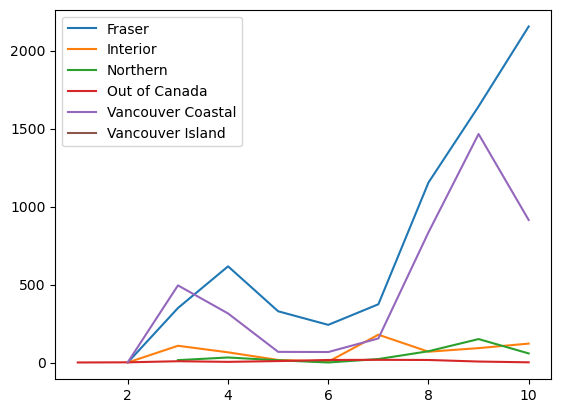

In [22]:
plt.plot(Fmonth,label = 'Fraser')
plt.plot(Imonth,label = 'Interior')
plt.plot(Nmonth,label = 'Northern')
plt.plot(OCmonth,label = 'Out of Canada')
plt.plot(VCmonth,label = 'Vancouver Coastal')
plt.plot(VImonth,label = 'Vancouver Island')
plt.legend()

In [28]:
Fmonth = Fraser.groupby('month')['HA'].count().reset_index()
Fmonth['cumcase'] = Fmonth['HA'].cumsum()

Imonth = Interior.groupby('month')['HA'].count().reset_index()
Imonth['cumcase'] = Imonth['HA'].cumsum()

Nmonth = Northern.groupby('month')['HA'].count().reset_index()
Nmonth['cumcase'] = Nmonth['HA'].cumsum()

OCmonth = OC.groupby('month')['HA'].count().reset_index()
OCmonth['cumcase'] = OCmonth['HA'].cumsum()

VCmonth = VC.groupby('month')['HA'].count().reset_index()
VCmonth['cumcase'] = VCmonth['HA'].cumsum()

VImonth = VI.groupby('month')['HA'].count().reset_index()
VImonth['cumcase'] = VImonth['HA'].cumsum()

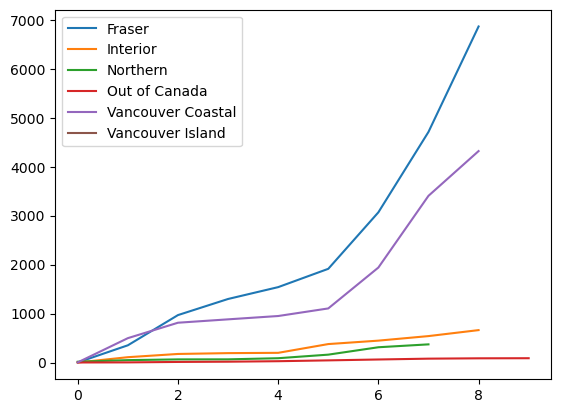

In [29]:
plt.plot(Fmonth['cumcase'],label = 'Fraser')
plt.plot(Imonth['cumcase'],label = 'Interior')
plt.plot(Nmonth['cumcase'],label = 'Northern')
plt.plot(OCmonth['cumcase'],label = 'Out of Canada')
plt.plot(VCmonth['cumcase'],label = 'Vancouver Coastal')
plt.plot(VImonth['cumcase'],label = 'Vancouver Island')
plt.legend()

In [42]:
cum = cv.groupby(['HA','month'])['Age_Group'].count().cumsum().reset_index()
cum.rename(columns = {'Age_Group':'Accumulative_cases'}, inplace = True)
cum.head(8)

,HA,month,Accumulative_cases
0,Fraser,2,2
1,Fraser,3,352
2,Fraser,4,969
3,Fraser,5,1298
4,Fraser,6,1540
5,Fraser,7,1914
6,Fraser,8,3068
7,Fraser,9,4710
